## Introduction

### Import Libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Uploading dataset

In [13]:
try:
    file_path = 'salaries.csv'
    data_salaries = pd.read_csv(file_path)
except FileNotFoundError: 
    print ('No such file or directory. Check the file path')
else: 
    print ('successful upload!')
    

successful upload!


### **Dataset exploration**

##### 1. Dimension, columns, and total cells 

In [29]:
print ('Dimensions of dataset (rows x columns): ', data_salaries.shape, '\n')

print ('Total amount cells: ', data_salaries.size, '\n')

print ('Columns name: ', list(data_salaries.columns), '\n')


Dimensions of dataset (rows x columns):  (9005, 11) 

Total amount cells:  99055 

Columns name:  ['work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size'] 



##### 2. Info about columns

In [35]:
print ('Info about columns: \n\n')
data_salaries.info()

Info about columns: 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9005 entries, 0 to 9004
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9005 non-null   int64 
 1   experience_level    9005 non-null   object
 2   employment_type     9005 non-null   object
 3   job_title           9005 non-null   object
 4   salary              9005 non-null   int64 
 5   salary_currency     9005 non-null   object
 6   salary_in_usd       9005 non-null   int64 
 7   employee_residence  9005 non-null   object
 8   remote_ratio        9005 non-null   int64 
 9   company_location    9005 non-null   object
 10  company_size        9005 non-null   object
dtypes: int64(4), object(7)
memory usage: 774.0+ KB


We can see that there aren't null values.

##### 3. Description general about dataset

In [34]:
print ('General description about dataset: \n\n', data_salaries.describe())

General description about dataset: 

          work_year        salary  salary_in_usd  remote_ratio
count  9005.000000  9.005000e+03    9005.000000   9005.000000
mean   2022.743254  1.741447e+05  149466.086619     38.600777
std       0.537819  4.510697e+05   63970.482789     48.054521
min    2020.000000  1.400000e+04   15000.000000      0.000000
25%    2023.000000  1.053800e+05  105000.000000      0.000000
50%    2023.000000  1.440000e+05  142200.000000      0.000000
75%    2023.000000  1.900000e+05  186000.000000    100.000000
max    2023.000000  3.040000e+07  450000.000000    100.000000


## Boxplot of salary

##### 1. Boxplot of all salaries

Text(0.5, 1.0, 'Boxplot of all salaries')

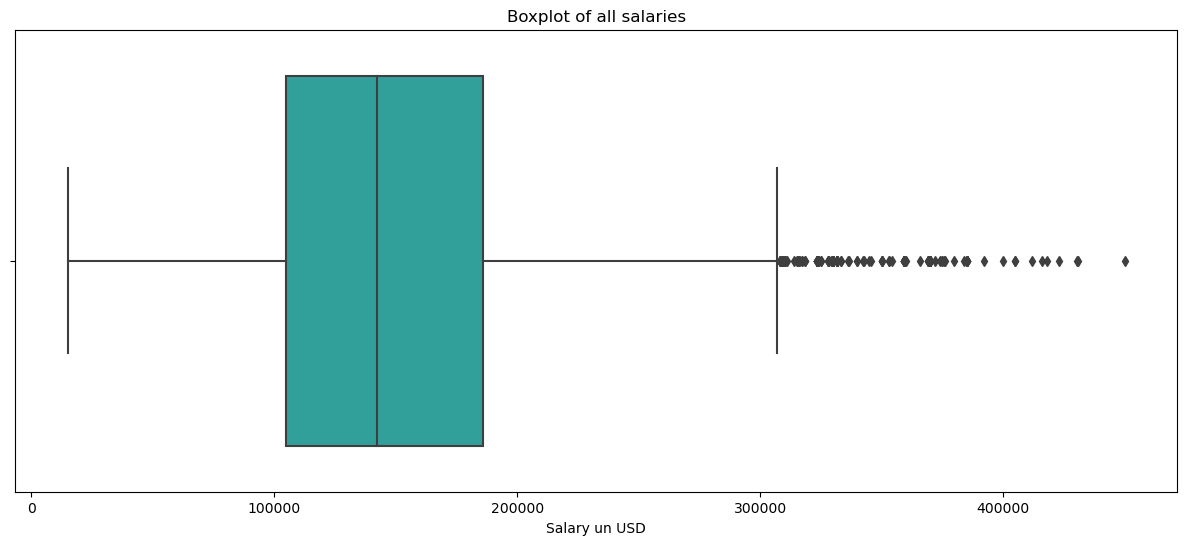

In [60]:
plt.figure(figsize=(15,6))
sns.boxplot(x=data_salaries['salary_in_usd'], data=data_salaries, color='#20B2AA')
plt.xlabel('Salary un USD')
plt.title('Boxplot of all salaries')

The median is slightly to the left, so we can say that the distribution is positively skewed and there are several outliners. 

##### 2. Boxplot of salary by Experience Level

Experience Level: 
 EN = Entry Level/Junior
 MI = Intermediate
 SE = Senior
 EX = Director


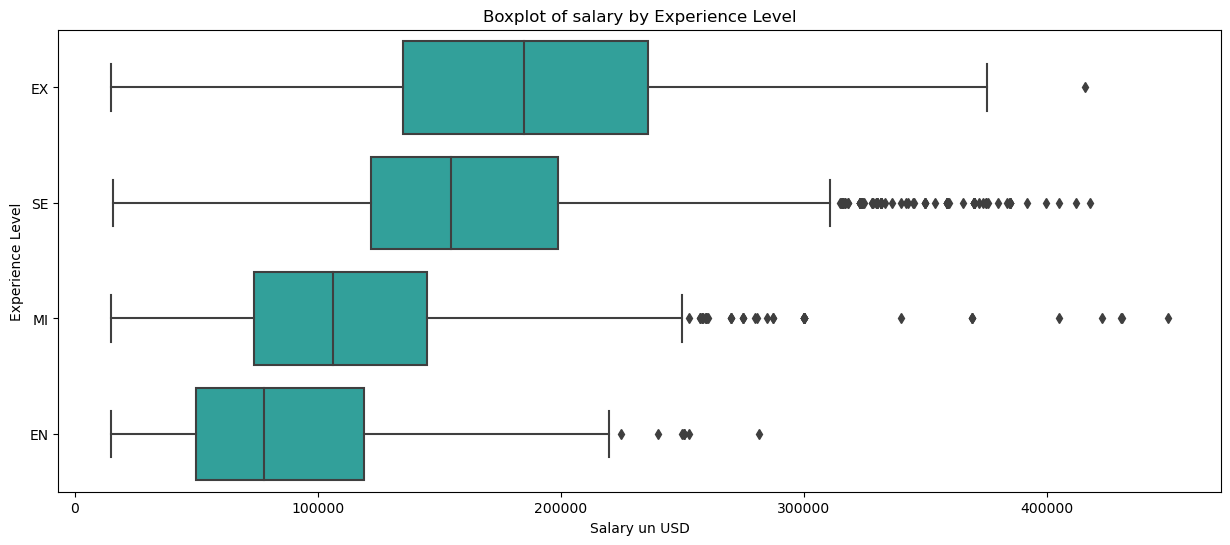

In [61]:
plt.figure(figsize=(15,6))
sns.boxplot(x=data_salaries['salary_in_usd'], y= data_salaries['experience_level'], data=data_salaries, color='#20B2AA', order=['EX', 'SE', 'MI', 'EN'])
plt.xlabel('Salary un USD')
plt.ylabel('Experience Level')
plt.title('Boxplot of salary by Experience Level')
print ('Experience Level: \n EN = Entry Level/Junior\n MI = Intermediate\n SE = Senior\n EX = Director' )

We notice that in the case of EN, MI and SE experience level the median is slightly to the left (as is that general median). <br> The boxplot at EX experience level has a normal distribution. 